In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [2]:
audio_files = glob('C:\\Users\\DHANALAKSHMI\\OneDrive\\Desktop\\SPECH AI\\speech3.wav')


In [3]:
# Play audio file
ipd.Audio(audio_files[0])

## LIBROSA.EFFECTS.TRIM

In [4]:
y, sr = librosa.load(audio_files[0])
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

y: [ 2.1454722e-05  3.2617772e-05  2.6251491e-06 -3.1967142e-05
 -5.9458478e-05 -7.9908852e-05 -9.7013552e-05 -7.8557772e-05
 -5.8563091e-05 -2.0175550e-05]
shape y: (145042,)
sr: 22050


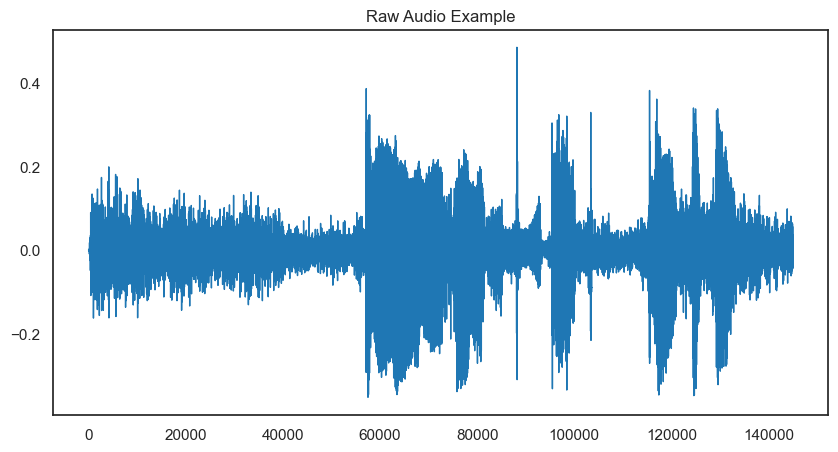

In [5]:
pd.Series(y).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Example',
                 color=color_pal[0])
plt.show()

In [8]:
# Load some audio
y, sr = librosa.load('C:\\Users\\DHANALAKSHMI\\OneDrive\\Desktop\\SPECH AI\\speech3.wav')
# Trim the beginning and ending silence
yt, index = librosa.effects.trim(y)
# Print the durations
print(librosa.get_duration(y=y,sr=sr), librosa.get_duration(y=yt,sr=sr))


6.577868480725623 6.577868480725623


In [10]:
from IPython.display import Audio
print("Trimmed audio:")
Audio(data=yt, rate=sr)

Trimmed audio:


C:\Users\DHANALAKSHMI\AppData\Local\Temp\ipykernel_13180\83640943.py:26: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, format='%+2.0f dB')


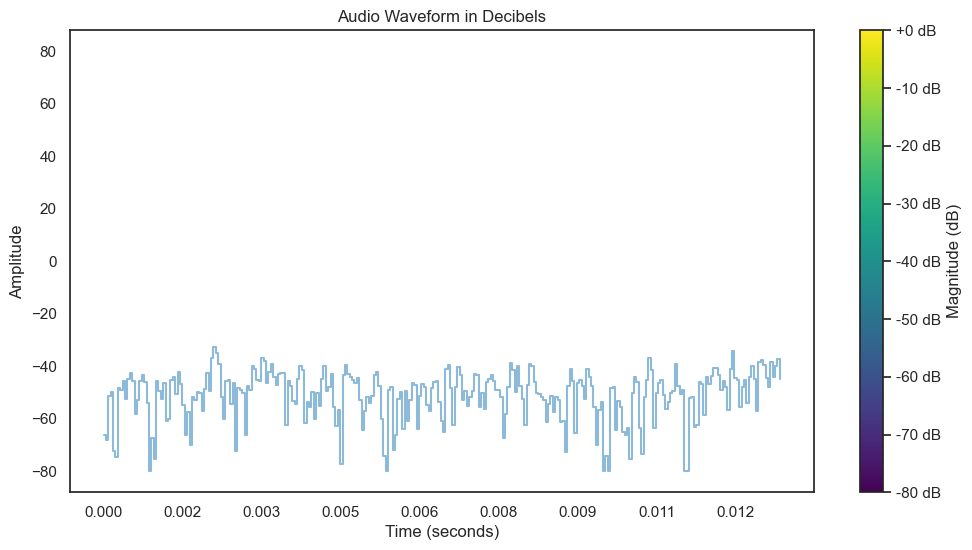

In [17]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import ScalarMappable

# Load the audio file
file_path = 'C:\\Users\\DHANALAKSHMI\\OneDrive\\Desktop\\SPECH AI\\speech3.wav'
y, sr = librosa.load(file_path)

# Convert amplitude to decibels
y_db = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

# Plot the audio waveform against decibels
plt.figure(figsize=(12, 6))
librosa.display.waveshow(y_db, sr=sr, alpha=0.5)  # Plot the waveform
plt.title('Audio Waveform in Decibels')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')

# Create a ScalarMappable object for the color bar
sm = ScalarMappable(cmap='viridis')
sm.set_array(y_db)

# Add a color bar for dB scale
cbar = plt.colorbar(sm, format='%+2.0f dB')  
cbar.set_label('Magnitude (dB)')

plt.show()


## TRIMMING USING CUSTOM DECIBEL

In [24]:
import librosa

# Load the audio file
file_path = 'C:\\Users\\DHANALAKSHMI\\OneDrive\\Desktop\\SPECH AI\\speech3.wav'
y, sr = librosa.load(file_path)

# Define custom threshold values for trimming
start_trim_db = 15  # Adjust this value according to your requirement
end_trim_db = 10    # Adjust this value according to your requirement

# Trim the audio using custom thresholds
yt, index = librosa.effects.trim(y, top_db=start_trim_db, ref=np.max, frame_length=2048, hop_length=512)

# Calculate the durations
duration_original = librosa.get_duration(y=y, sr=sr)
duration_trimmed = librosa.get_duration(y=yt, sr=sr)

# Print the durations
print("Original duration:", duration_original, "Trimmed duration:", duration_trimmed)


Original duration: 6.577868480725623 Trimmed duration: 6.5712471655328795


In [26]:
from IPython.display import Audio
print("Trimmed audio:")
Audio(data=yt, rate=sr)

Trimmed audio:


## LIBROSA.EFFECTS.SPLIT()

In [27]:
import librosa

# Load the audio file
file_path = 'C:\\Users\\DHANALAKSHMI\\OneDrive\\Desktop\\SPECH AI\\speech3.wav'
y, sr = librosa.load(file_path)

# Split the audio signal into non-silent intervals
intervals = librosa.effects.split(y)

# 'intervals' is a NumPy array containing the start and end indices of each non-silent interval

# Print the intervals
print(intervals)


[[     0 145042]]


In [31]:
import librosa
import soundfile as sf

# Load the audio file
file_path = 'C:\\Users\\DHANALAKSHMI\\OneDrive\\Desktop\\SPECH AI\\speech3.wav'
y, sr = librosa.load(file_path)

# Split the audio signal into non-silent intervals
intervals = librosa.effects.split(y)

# Iterate over each interval and print the split signals
for i, (start, end) in enumerate(intervals):
    split_signal = y[start:end]  # Extract the split signal
    output_path = f'split_signal_{i}.wav'
    sf.write(output_path, split_signal, sr)  # Save the split signal as a WAV file
    duration_seconds = librosa.get_duration(y=split_signal, sr=sr)
    print(f'Split signal {i + 1}: Duration = {duration_seconds:.2f} seconds')



Split signal 1: Duration = 6.58 seconds


## 3RD

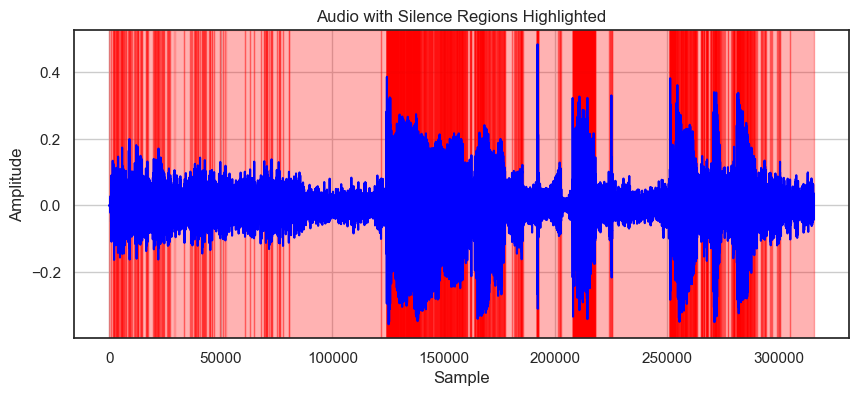

In [28]:
# Define a function to calculate the energy of a given signal
def calculate_energy(signal):
    squared_signal = np.square(signal)  # Calculate the squared signal
    energy = np.sum(squared_signal)  # Calculate the total energy by summing the squared samples
    return energy

# Function to detect silence based on energy threshold
def detect_silence(signal, threshold):
    energy = calculate_energy(signal)
    if energy < threshold:  # If the energy is below the threshold, consider it as silence
        return True
    else:
        return False

# Load the audio file
file_path = "C:\\Users\\DHANALAKSHMI\\OneDrive\\Desktop\\SPECH AI\\speech3.wav"
audio_signal, sample_rate = librosa.load(file_path, sr=None)

# Define an energy threshold for silence detection
energy_threshold = 0.01  # Adjust this threshold as needed

# Detect silence regions in the audio
silence_regions = []
current_region = []
for i, sample in enumerate(audio_signal):
    if detect_silence(sample, energy_threshold):
        current_region.append(i)
    elif current_region:
        silence_regions.append(current_region)
        current_region = []
if current_region:
    silence_regions.append(current_region)

# Plot the waveform with silence regions highlighted
plt.figure(figsize=(10, 4))
plt.plot(audio_signal, color='b')
for region in silence_regions:
    plt.axvspan(region[0], region[-1], color='r', alpha=0.3)
plt.title("Audio with Silence Regions Highlighted")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()